# This notebook runs LDA on a dataset
## Includes coherence tests & visualiations.

In [ ]:
!pip3 install pyLDAvis

     |████████████████████████████████| 1.7 MB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=518138e6fa221de9dee2f1760a80e756c9b361fd6e000a4e50d1e5870e502c33
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/CSS Project' 
%cd $path

/content/drive/MyDrive/Colab Notebooks/CSS Project


## Read data in submissions dataframe

In [ ]:
# Importing modules
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

submissions = pd.read_csv('all_submissions_filtered_labeled.csv')

submissions = submissions[submissions['label'] == 0]

print(len(submissions))
print(submissions.head())

43170
    Unnamed: 0                                              title  \
15          15                   I actually love being unemployed   
17          17                             An Honest Cover Letter   
19          19          Taking advantage of zero hours contracts.   
21          21  Trying to get unemployment for a good reason, ...   
42          42                                      Maggie's Farm   

                                                 body      id  label  
15  you know what  i'm not going to lie  i love be...  3i7ksa      0  
17  this is                 yet another cover lett...  3fj952      0  
19  i recently took a zero hours cleaning job from...  3kjjqh      0  
21  currently employed full time at a company for ...  3kwvqk      0  
42    i ain't gonna work on maggie's farm no more ...  5hdkuj      0  


#Summary Statistics

In [ ]:
# submissions['body'] = [str(i) for i in submissions['body']]
mean = submissions['body'].str.split().apply(len).mean()
max = submissions['body'].str.split().apply(len).max()
min = submissions['body'].str.split().apply(len).min()

print(mean)
print(max)
print(min)

284.1377808663424
5555
7


## WordCloud Visualization

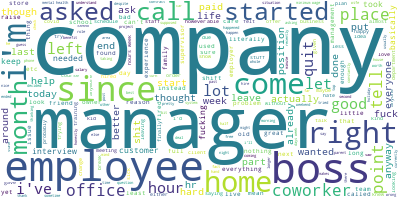

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(submissions['body'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', stopwords = stop_words)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Helper functions to format the dataframe in a list of submissions-to-words.

Also removes stopwords

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(["one", "even", "said", "say", "well", "also", "way", "guy", "x200b", "amp"])
# stop_words.extend(['from', 'use', 'https', 'amp', 'http', 'www', 'com'])
# stop_words.extend(['work', 'people', 'time', 'job', 'working', 'get', 'like', 'one', 'oh', 'would', 'said'])
# stop_words.extend(['want', 'would', 'really', 'jobs', 'back', 'day', 'go', 'got', 'much', 'even', 'us', 'also'])
# stop_words.extend(['could', 'make', 'going', 'see', 'know', 'el', 'need', 'things', 'two', 'new', 'many', 'year', 'years'])
# stop_words.extend(['every', 'still', 'well', 'think', 'way', 'something', 'take', 'per', 'gt', 'al', 'lt', 'money', 'pay']) #life
# stop_words.extend(['sub', 'workers', 'find', 'feel', 'person', 'never', 'first', 'told', 'may', 'worked', 'never', 'always'])
# stop_words.extend(['made', 'getting', 'guys', 'give', 'another', 'someone', 'making', 'went', 'away', 'telling', 'came'])
# stop_words.extend(['anything', 'ever', "Im", "dont", 'pop', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'gucci', 'gang'])


stop_words.extend(["like", "get", "would", "got", "back", "one", "go", "even", "told"])
stop_words.extend(["year", "years", "day", "days", "week", "weeks", "month", "months"])
stop_words.extend(["work", "time", "job", "people", "want", "working", "company", "said", "going"])
stop_words.extend(["guy", "worked", "could", "also", "know", "hour", "hours", "really", "take", "gt"])
stop_words.extend(["well", "much", "things", "getting", "since", "amp"])
stop_words.extend(["first", "make", "something", "still", "two", "every", "made", "pay", "paid"])
stop_words.extend(["money", "manager", "feel", "us", "boss", "new", "never"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# print(lemmatize([['I', 'am', 'running', 'away']]))
# print(lem.lemmatize("going", pos = "v"))

[['I', 'am', 'running', 'away']]
go


In [ ]:
def df_to_list(df):
  data = df.body.values.tolist()
  # data_words is a num_samples x num_words sized matrix of words
  data_words = list(sent_to_words(data))

  # remove stop words
  data_words = remove_stopwords(data_words)
  # print(data_words[0][:30])

  return data, data_words
data, data_words = df_to_list(submissions)

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=100, threshold=1000) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
# for bigr in bigram_mod.phrasegrams.keys():
#     print(bigr)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words = make_bigrams(data_words)

## Indexes words to feed into the LDA model. These are all the parameters that go into the LDA model.

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Term Document Frequency
corpus = [id2word.doc2bow(word) for word in data_words]

# number of topics
num_topics = 10

In [ ]:
from pprint import pprint
from nltk.stem import PorterStemmer

def build_lda(corpus, id2word, num_topics):
  lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, num_topics = num_topics)
  return lda_model

# Build LDA model
# for i in range(10, 60, 5):
lda_model = build_lda(corpus, id2word, num_topics)
coherence_model_lda = CoherenceModel(model = lda_model, texts = data_words, dictionary = id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("num_topics = " + str(num_topics))
print('\nCoherence Score: ', coherence_lda)
ps = PorterStemmer()

for i in range(num_topics):
  topic_terms, probabilities = zip(*lda_model.get_topic_terms(i, topn = 10))
  stemmed_terms = set([ps.stem(id2word[i]) for i in topic_terms])
  print(stemmed_terms)

# # Print the key words in the 10 topics
pprint(lda_model.print_topics())

num_topics = 10

Coherence Score:  0.27389705612894427
{'school', 'put', 'start', 'around', 'life', 'want', 'good', 'quit', 'last', 'job'}
{'need', 'way', 'anoth', 'give', 'experi', 'salari', 'good', 'life', 'posit', 'job'}
{'need', 'part', 'famili', 'right', 'leav', 'alway', 'good', 'life', 'see', 'fuck'}
{'health', 'start', 'home', 'done', 'sick', 'covid', 'quit', 'good', 'last', 'shift'}
{'need', 'tell', 'tri', 'put', 'anoth', 'shit', 'everyon', 'leav', 'quit', 'offic'}
{'call', 'ask', 'help', 'team', 'start', 'next', 'staff', 'better', 'went', 'last'}
{'need', 'way', 'lot', 'home', 'next', 'right', 'think', 'alway', 'good', 'find'}
{'need', 'ask', 'last', 'store', 'christma', 'come', 'let', 'call', 'offic'}
{'call', 'ask', 'tell', 'team', 'anoth', 'home', 'think', 'covid', 'anyth', 'last'}
{'famili', 'way', 'busi', 'mani', 'wage', 'ever', 'good', 'life', 'make', 'job'}
[(0,
  '0.005*"wanted" + 0.005*"jobs" + 0.005*"good" + 0.005*"put" + '
  '0.004*"started" + 0.004*"last" + 0.004*"

In [ ]:
import numpy as np
import json
from tqdm import tqdm


def list_to_json(data, name):
  with open(name, "w") as f:
    json.dump(data, f)
def df_to_csv(data, cols, label):
    df = pd.DataFrame(data, columns=cols)
    df.to_csv(label + ".csv")
def get_exemplars(lda_model, corpus, data):
  doc_lda = lda_model[corpus]
  exemplars = {}
  exemplar_ids = {}
  for i in tqdm(range(len(doc_lda))):
    topics, scores = zip(*doc_lda[i])

    # Add all exemplars to dictionary
    if np.max(scores) > 0.98:
      topic = topics[np.argmax(scores)]

      if topic not in exemplars:
        exemplars[topic] = []
      exemplars[topic].append(data[i])

      if topic not in exemplar_ids:
        exemplar_ids[topic] = []
      exemplar_ids[topic].append(submissions['id'][i])

  # Save exemplars & exemplar IDs in JSON format
  for key, value in exemplars.items():
    path = "exemplars/" + str(key) + ".json"
    list_to_json(value, path)
  for key, value in exemplar_ids.items():
    print(len(value))
    id_path = "exemplars/" + str(key) + "_id.json"
    list_to_json(value, id_path)
def get_topic_weights(lda_model, corpus):
  weights = {}
  doc_lda = lda_model[corpus]
  for i in tqdm(range(len(doc_lda))):
    for doc in doc_lda[i]:
      topic, weight = doc
      if topic not in weights:
        weights[topic] = 0
      weights[topic] += weight
  print(weights)
  
# get_topic_weights(lda_model, corpus)
# get_exemplars(lda_model, corpus, data)

In [ ]:
def turn_to_csv(lda_model, corpus):
  scores = lda_model[corpus]
  exemplars = {}
  labels = []
  for i in tqdm(range(len(scores))):
    topics, probs = zip(*scores[i])

    # Add all exemplars to dictionary
    if np.max(probs) > 0.75:
      label = topics[np.argmax(probs)]
      id = submissions['id'][i]
      labels.append([id, label])
  columns = ['id', 'topic']
  df_to_csv(labels, columns, "75th_labels")
turn_to_csv(lda_model, corpus)

100%|██████████| 144000/144000 [01:51<00:00, 1295.37it/s]


In [ ]:
from gensim.models import CoherenceModel

  # a measure of how good the model is. lower the better.
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, texts = data_words, dictionary = id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27965867095453967


In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
topics = [['human', 'computer', 'system', 'interface'],['graph', 'minors', 'trees', 'eps']]
cm = CoherenceModel(topics=topics, corpus=common_corpus, dictionary=common_dictionary, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value
print(coherence)

-7.105015580153772


In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'test' + str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
  LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
  with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'test_'+ str(num_topics) + '.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.057084  0.033600       1        1  51.921605
0      0.028315  0.019366       2        1  12.429153
4      0.008794 -0.030056       3        1  12.134910
1      0.002832 -0.036226       4        1   9.623638
3      0.004243 -0.007118       5        1   7.614569
5     -0.101267  0.020434       6        1   6.276125, topic_info=       Term          Freq         Total Category  logprob  loglift
158  people   8716.000000   8716.000000  Default  30.0000  30.0000
74     like   7776.000000   7776.000000  Default  29.0000  29.0000
22      job  11053.000000  11053.000000  Default  28.0000  28.0000
460    jobs   2991.000000   2991.000000  Default  27.0000  27.0000
61    would   6335.000000   6335.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
118    good    152.190541   2954.503384   Topic6  -6.1612  -0.1975
73     know    155.831988   4139.860618   Topic6  -6.1375  -0.5112
75     make    148.627380   4241.526703   Topic6  -6.1849  -0.5828
313      go    144.503742   3915.430624   Topic6  -6.2130  -0.5310
403     day    141.669771   6136.013838   Topic6  -6.2328  -1.0000

[576 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
283       1  0.511307    actually
283       2  0.185151    actually
283       3  0.118602    actually
283       4  0.088293    actually
283       5  0.062596    actually
...     ...       ...         ...
4456      3  0.724221       youtu
4456      4  0.085924       youtu
4456      5  0.098199       youtu
4456      6  0.012275       youtu
2937      5  0.897391  zuckerberg

[1540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4, 6])